#**Dalitz plot simulation for a** $D^{+}→k^{-}\pi^{+} \pi^{+}$ **decay**
19/11/2023,

Author: Elser Lopez, Contact: elser.adolfo.lopez@gmail.com

General information

This code makes a Montecarlo simulation through the Metropolis-Hastings algorithm, following the equations for a three body decay showing into the  [PDG Kinematics review](https://pdg.lbl.gov/2023/reviews/contents_sports.html), and using the masses as: $M=m_{D}=1870$ MeV, $m_1=m_{k^{-}}=494$ MeV,  $m_{k^{*0}}=890$ MeV, $m_{2}=m_{3}=m_{\pi^{+}}=140$ MeV.  

On the other hand, the aceptance ratio uses the probability amplitud as

$|{\overline{\mathcal{M}}(m_{12_{i→j}})}|^2=A^2 \dfrac{m_{k^{*}}^4}{(m_{12_{j}}^2-m_{k^{*}}^2)^2 +m_{k^{*}}^2\Gamma_{k^{*}}^2  }$,

where $A^2=2.18 \times 10^{-17}$ and $Γ_{k*}=50$ MeV.


In order to run this code you need the following Python Libraries:

*   numpy
*   random
*   matplotlib
*   mpl_scatter_density

This code saves two figures corresponding to the Dalitz plot from the equations and a Dalitz plot from the Montecarlo simulation. The first one is called "DalitzPlot.pdf" and the second "DalitzPlotMontecarlo.pdf"

***Finally, this code was built using Python 3.10.12; Other versions may not work.***

# Importing libraries
cheking the Python version  and installing libraries

In [1]:
pip install mpl-scatter-density --q && python --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.7 MB/s eta 0:00:00
Python 3.10.12


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# Defining functions

In [3]:
#------FUNCTIONS------

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'), #0 color when we have zero points
    (0.1, '#90caf9'),
    (0.2, '#64b5f6'),
    (0.3, '#42a5f5'),
    (0.4, '#2196f3'),
    (0.6, '#1565c0'),
    (0.8, '#001014'),
    (1, '#000000'),

], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis, dpi=40)
    fig.colorbar(density, label='Number of points per pixel')

def Rdn12value(m12min,m12max):
    '''Function that generates a random m12 number between m12min and m12max'''
    num=0
    while m12min>=num:
        num=np.random.uniform(0,1)*m12max
    return num

def E2_fun(m12value,m1value,m2value):
    E2val=(m12value**2-m1value**2+m2value**2)/(2*m12value)
    return E2val

def E3_fun(m12value,Mvalue,m3value):
    E3val=(Mvalue**2-m12value**2-m3value**2)/(2*m12value)
    return E3val

def m23Max_fun(m12,m1,m2,m3,M):
    '''Function a point in the m23_maximum curve for an m12 given value '''
    m23max=((E2_fun(m12,m1,m2)+E3_fun(m12,M,m3))**2 - (np.sqrt(E2_fun(m12,m1,m2)**2-m2**2) - np.sqrt(E3_fun(m12,M,m3)**2-m3**2))**2) #max of the distribution
    return m23max

def m23Min_fun(m12,m1,m2,m3,M):
    '''Function a point in the m23_minimum curve for an m12 given value '''
    m23min=((E2_fun(m12,m1,m2)+E3_fun(m12,M,m3))**2 - (np.sqrt(E2_fun(m12,m1,m2)**2-m2**2) + np.sqrt(E3_fun(m12,M,m3)**2-m3**2))**2)
    return m23min

def check_range(m12min,m12max,x,y,m1,m2,m3,M):
    '''Function to check the validity of a random y value given a x (valid) value '''
    if x>=m12min and x<=m12max: #check if the x value is between the region m12min=<x<=m12max
        ymin=m23Min_fun(x,m1,m2,m3,M)
        ymax=m23Max_fun(x,m1,m2,m3,M)
        if y>= ymin and y<=ymax: #check if the y is between the region ymin=<y<=ymax
            return 1
        else:
            return 0
    else:
      return 0

def prob_M2(m12value,mk,Gamma,A2):
    '''Probability density function |M|^2=A^2(m_k^4/(m_12^2-m_k^2)^2+m_k^2 Gamma_k^2), given a m12value'''
    Pdf=(A2*(mk**4))/((m12value**2 - mk**2 )**2 +mk**2 * Gamma**2 )
    return Pdf

def metropolis_algorithm(num_samples,m1,m2,m3,M,m12_min,m12_max,m23Maximun,Gamma,mk,A2,Delta):
    '''Metropolis algorithm function to generate points in Dalitz plot '''
    xvalue_initial=Rdn12value(m12_min,m12_max) # initial x value
    yvalue_initial=m23Min_fun(xvalue_initial,m1,m2,m3,M) # initial y value
    samples = [] # list to save the valid samples
    x, y =xvalue_initial,yvalue_initial # Initial point in Dalitz plot
    acceptance_ratio =0 #initial value

    for k in range(num_samples):
        rnum=np.random.uniform(-1,1) #random number between [-1,1]
        #Delta=1000 #delta de cada paso
        # Propose a new point in the vicinity of the current point
        x_new, y_new =xvalue_initial+Delta*rnum, np.random.uniform(0,1)*m23Maximun
        #print(x_new,' ', y_new)
        checkR=check_range(m12_min,m12_max,x_new,y_new,m1,m2,m3,M) #check if the y, y value is between ymin and ymax for a x_new given
        if checkR==1:
            # Calculate acceptance ratio
            acceptance_ratio = ( prob_M2(x_new,mk,Gamma,A2) )/( prob_M2(x,mk,Gamma,A2) ) #saving the new acceptance value
            # Accept the new point with probability equal to the acceptance ratio
            if acceptance_ratio >= np.random.uniform(0, 1):
                x, y = x_new, y_new # Resetting the new values of x, y
                samples.append((x, y)) # Saving the values in the samples list
            else: #recover the previous configuration
                x, y= x_new-Delta*rnum, y_new

    return np.array(samples)
#------END FUNCTIONS------

# Running the Montecarlo Simulation

In [4]:
#------Problem Values------
M  = 1870 # [MeV] mass of D^{+}
m1 = 494  # [MeV] mass of k^{-}
m2 = 140  # [MeV] mass of pi^{+}
m3 = 140  # [MeV] mass of pi^{+}
mk = 890  # [MeV] mass of K^{*0}
Gammak= 50 # [MeV] constant given \Gamma_{k*}
A2s= 2.19*(1e-17) # adimensional constant of normalization \abs{A}^2
#------End problem values-----

#------Curve values-----
m12_min = (m1+m2) # min value
m12_max = (M-m3) # max value
m12 = np.arange(m12_min,m12_max+1,1) #list with m12 values

E2 = (m12**2-m1**2+m2**2)/(2*m12) #list of energies
E3 = (M**2-m12**2-m3**2)/(2*m12) #listo of energies

m23_max = ((E2+E3)**2 - (np.sqrt(E2**2-m2**2) - np.sqrt(E3**2-m3**2))**2) # Points for the max curve
m23_min = ((E2+E3)**2 - (np.sqrt(E2**2-m2**2) + np.sqrt(E3**2-m3**2))**2) # Points for the min curve

m23Maximun=m23_max.max() #maximum m23^2 allowed value in the Dalitz plot

#------End curve values------

#------MONTECARLO SIMULATION------
random.seed(10) # setting the random seed
np.random.seed(10) # setting numpy random seed
# Number of samples to generate
num_samples = 500000
Delta=700
# Generate samples using Metropolis algorithm

print('Generando una simulacion Montecalro de ', num_samples, 'samples' )
print('para el decaimiento D->k- pi+ pi+')

samples = metropolis_algorithm(num_samples,m1,m2,m3,M,m12_min,m12_max,m23Maximun,Gammak,mk,A2s,Delta)

print('Se generaron ', len(samples[:,0]), 'puntos validos de ', num_samples, 'samples')
print('Lo cual equivale al ', round((len(samples[:,0])/num_samples)*100,2), '%' )


Generando una simulacion Montecalro de  500000 samples
para el decaimiento D->k- pi+ pi+
Se generaron  174511 puntos validos de  500000 samples
Lo cual equivale al  34.9 %


# Plots

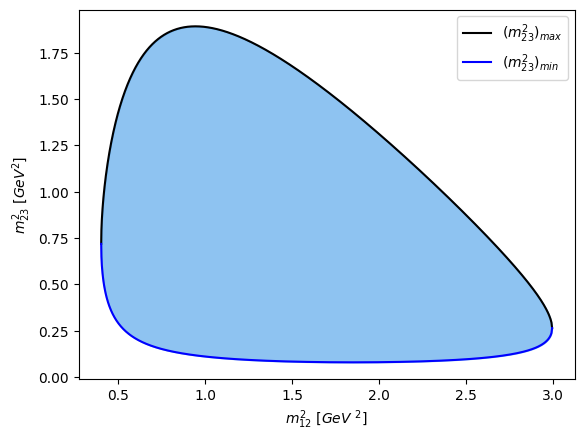

/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.10/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


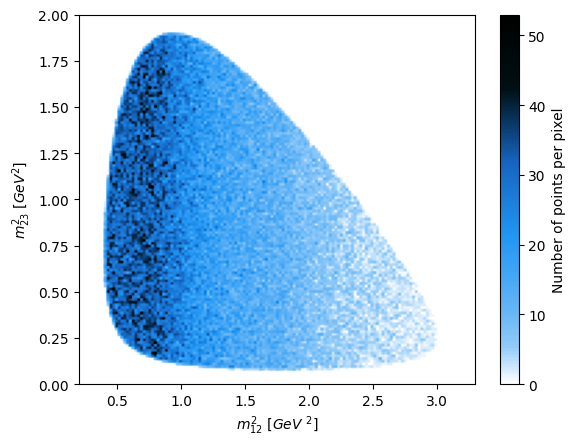

In [5]:
# Dalitz plot

plt.plot((m12*1e-3)**2, m23_max*1e-6, color='black', label=r'$(m^2_{23})_{max}$')
plt.plot((m12*1e-3)**2, m23_min*1e-6,color='blue',label=r'$(m^2_{23})_{min}$')
plt.fill_between((m12*1e-3)**2, m23_max*1e-6, m23_min*1e-6, color='#1e88e5', alpha=.5)
plt.xlabel(r'$m^2_{12}$ [$GeV$ $^2$]')
plt.ylabel(r'$m^2_{23}$ [$GeV$$^2$]')
plt.legend()
plt.savefig('DalitzPlot.pdf')
plt.show()

fig = plt.figure()
using_mpl_scatter_density(fig, (samples[:,0]*1e-3)**2, samples[:,1]*1e-6)
plt.xlabel(r'$m^2_{12}$ [$GeV$ $^2$]')
plt.ylabel(r'$m^2_{23}$ [$GeV$$^2$]')
plt.xlim([0.2, 3.3])
plt.ylim([0, 2])
plt.savefig('DalitzPlotMontecarlo.pdf')
plt.show()